In [28]:
from modules import data

records = data.from_json('./data/json/ind.json')
for record in records:
    record.min_quality(90)
    

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def to_df(records) -> pd.DataFrame:
    """
    Creates a dataframe where each column are different features (i.e., compounds). 
    
    A column of `Label` is appended in the last column for classification tasks.
    """
    output = pd.DataFrame()
    synonyms = {
        'Ethyl Alcohol': 'Ethanol',
        'Limonene': 'D-Limonene',
    }
    
    for record in records:
        column_name = f'{record.envr} {record.medium} {record.species} {record.time}h {record.trial}'
        df = record.data.copy(deep=True)
        df.drop(['Retention Time', 'Relative Area', 'ID', 'CAS Number', 'Quality', 'Type', 'Width'], axis=1, inplace=True)
        df.rename({'Area': column_name}, axis=1, inplace=True)
        df.set_index('Compound', inplace=True)
        df.rename(index=synonyms, inplace=True)
        df = df.groupby(df.index).sum()
        output = pd.concat([output, df], axis=1)
        
    output.fillna(0.0, inplace=True)
    output = output.T
    
    # Filtering out significant compounds
    sig_list = pd.read_excel('./data/sigs.xlsx').iloc[:, 0].to_list()
    output = output[sig_list]
    
    # Standard Scaling
    output = pd.DataFrame(StandardScaler().fit_transform(output), index=output.index, columns=output.columns)
    
    output['Envr'] = [record.envr for record in records]
    output['Medium'] = [record.medium for record in records]
    output['Species'] = [record.species for record in records]
    
    return output

records_df = to_df(records)
records_df

Compound,"Benzenemethanol, .Alpha.-Methyl-,Acetate","Pyrazine, 2,5-Dimethyl","Heptane, 3-Methylene",Decane,"Benzene, 1,3-Bis(1,1-Dimethylethyl)","2H-Pyran, 2-Ethoxy-3,4-Dihydro","2-Propenoic Acid, 2-Ethylhexyl Ester",2-Octanone,"Octane, 4-Methyl","Pyrazine, 2-Ethyl-6-Methyl","2,4-Dimethyl-1-Heptene","Undecane, 2-Methyl",Envr,Medium,Species
Ae LB BS 0h 1,-0.135291,-0.385571,-0.242499,-0.250930,-0.263297,-0.108069,-0.10028,-0.098141,-0.266833,-0.216286,-0.261246,-0.318946,Ae,LB,BS
Ae LB BS 24h 1,-0.135291,-0.359123,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,Ae,LB,BS
Ae LB BS 3h 1,-0.135291,-0.257642,-0.242499,-0.137516,-0.200083,-0.108069,-0.10028,-0.098141,-0.183342,-0.216286,0.122919,-0.318946,Ae,LB,BS
Ae LB BS 9h 1,-0.135291,-0.306654,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,Ae,LB,BS
Ae LB Ctrl 0h 1,-0.135291,-0.420724,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.370298,-0.216286,-0.261246,-0.318946,Ae,LB,Ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
An TSB EC 9h 2,-0.135291,1.570522,-0.242499,1.112307,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,An,TSB,EC
An TSB SA 0h 2,-0.135291,-0.420724,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,An,TSB,SA
An TSB SA 24h 2,-0.135291,2.021104,-0.242499,1.679154,0.106905,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,An,TSB,SA
An TSB SA 3h 2,-0.135291,2.392083,-0.242499,0.671535,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,An,TSB,SA


In [30]:
from sklearn.preprocessing import LabelEncoder

envr_encoder = LabelEncoder()
med_encoder = LabelEncoder()
spec_encoder = LabelEncoder()

records_df['Envr'] = envr_encoder.fit_transform(records_df['Envr'])
records_df['Medium'] = med_encoder.fit_transform(records_df['Medium'])
records_df['Species'] = spec_encoder.fit_transform(records_df['Species'])

records_df

Compound,"Benzenemethanol, .Alpha.-Methyl-,Acetate","Pyrazine, 2,5-Dimethyl","Heptane, 3-Methylene",Decane,"Benzene, 1,3-Bis(1,1-Dimethylethyl)","2H-Pyran, 2-Ethoxy-3,4-Dihydro","2-Propenoic Acid, 2-Ethylhexyl Ester",2-Octanone,"Octane, 4-Methyl","Pyrazine, 2-Ethyl-6-Methyl","2,4-Dimethyl-1-Heptene","Undecane, 2-Methyl",Envr,Medium,Species
Ae LB BS 0h 1,-0.135291,-0.385571,-0.242499,-0.250930,-0.263297,-0.108069,-0.10028,-0.098141,-0.266833,-0.216286,-0.261246,-0.318946,0,0,0
Ae LB BS 24h 1,-0.135291,-0.359123,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,0,0,0
Ae LB BS 3h 1,-0.135291,-0.257642,-0.242499,-0.137516,-0.200083,-0.108069,-0.10028,-0.098141,-0.183342,-0.216286,0.122919,-0.318946,0,0,0
Ae LB BS 9h 1,-0.135291,-0.306654,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,0,0,0
Ae LB Ctrl 0h 1,-0.135291,-0.420724,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.370298,-0.216286,-0.261246,-0.318946,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
An TSB EC 9h 2,-0.135291,1.570522,-0.242499,1.112307,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,1,3,2
An TSB SA 0h 2,-0.135291,-0.420724,-0.242499,-0.400475,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,1,3,3
An TSB SA 24h 2,-0.135291,2.021104,-0.242499,1.679154,0.106905,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,1,3,3
An TSB SA 3h 2,-0.135291,2.392083,-0.242499,0.671535,-0.263297,-0.108069,-0.10028,-0.098141,-0.414593,-0.216286,-0.261246,-0.318946,1,3,3


In [31]:
import numpy as np

n_features = len(records_df.columns.drop(['Envr', 'Medium', 'Species']))
feature_names = records_df.columns.drop(['Envr', 'Medium', 'Species']).to_list()
envr_string = np.unique(envr_encoder.inverse_transform(records_df['Envr']))
medium_string = np.unique(med_encoder.inverse_transform(records_df['Medium']))
species_string = np.unique(spec_encoder.inverse_transform(records_df['Species']))

In [32]:
# import pandas as pd
# import numpy as np

# def bootstrap(records: pd.DataFrame, n_new:int=10) -> pd.DataFrame:
#     output = []
#     for group, group_data in records.groupby(['Envr', 'Medium', 'Species']):
#         group_size = len(group_data)
#         bootstrap_samples = []
#         for _ in range(n_new):
#             bootstrap_indices = np.random.choice(group_size, size=group_size, replace=True)
#             bootstrap_sample = group_data.iloc[bootstrap_indices]
#             bootstrap_samples.append(bootstrap_sample)
            
#         bootstrap_df = pd.concat(bootstrap_samples)
#         output.append(bootstrap_df)
    
#     return pd.concat(output)

# records_df = bootstrap(records_df)
# records_df

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.utils import to_categorical

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
combined_labels = records_df['Envr'].astype(str) + '_' + records_df['Medium'].astype(str) + '_' + records_df['Species'].astype(str)

train_idx, test_idx = next(stratified_split.split(records_df, combined_labels))

train_records = records_df.iloc[train_idx]

train_envr_labels = to_categorical(train_records['Envr'], 2)
train_medium_labels = to_categorical(train_records['Medium'], 4)
train_species_labels = to_categorical(train_records['Species'], 4)
train_values = train_records.drop(['Envr', 'Medium', 'Species'], axis=1).to_numpy()

test_records = records_df.iloc[test_idx]

test_envr_labels = test_records['Envr']
test_medium_labels = test_records['Medium']
test_species_labels = test_records['Species']
test_values = test_records.drop(['Envr', 'Medium', 'Species'], axis=1).to_numpy()


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

def multiclass_model():
    input_layer = Input(shape=(n_features, ))

    # shared layers
    shared_layer1 = Dense(512, activation='relu')(input_layer)
    shared_output = Dense(256, activation='relu')(shared_layer1)

    # envr classifier
    envr_dense1 = Dense(128, activation='relu')(shared_output)
    envr_output = Dense(2, activation='softmax', name='envr')(envr_dense1)

    # medium classifier
    med_dense1 = Dense(128, activation='relu')(shared_output)
    med_output = Dense(4, activation='softmax', name='medium')(med_dense1)

    # species classifier
    spec_dense1 = Dense(128, activation='relu')(shared_output)
    spec_dense2 = Dense(64, activation='relu')(spec_dense1)
    spec_output = Dense(4, activation='softmax', name='species')(spec_dense2)

    model = Model(inputs=input_layer, outputs=[envr_output, med_output, spec_output])
    losses = {
        'envr': 'binary_crossentropy',
        'medium': 'categorical_crossentropy',
        'species': 'categorical_crossentropy',
    }

    metrics = {
        'envr': 'accuracy',
        'medium': 'accuracy',
        'species': 'accuracy',
    }
    model.compile(optimizer='adam', loss=losses, metrics=metrics)
    return model

In [35]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold, KFold
import numpy as np

earlystop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
checkpoint = ModelCheckpoint(filepath='./data/ffn/multitask.keras', monitor='val_loss', save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.001, min_lr=0.000001)

kfold = KFold(n_splits=5, shuffle=True)
train_loss_history, train_acc_history, val_loss_history, val_acc_history = [], [], [], []
for train_index, val_index in kfold.split(train_values):
  X_train, X_val = train_values[train_index], train_values[val_index]
  envr_train, envr_val = train_envr_labels[train_index], train_envr_labels[val_index]
  medium_train, medium_val = train_medium_labels[train_index], train_medium_labels[val_index]
  species_train, species_val = train_species_labels[train_index], train_species_labels[val_index]
  
  model = multiclass_model()
  model.fit(
    X_train, 
    {
      'envr': envr_train, 
      'medium': medium_train, 
      'species': species_train
    }, 
    batch_size=4, 
    epochs=20, 
    validation_data=(
      X_val, 
      {
        'envr': envr_val, 
        'medium': medium_val, 
        'species': species_val
      }
    ), 
    callbacks=[checkpoint]
  )

  train_loss, train_envr_acc, train_medium_acc, train_species_acc = model.evaluate(
    X_train, 
    {
      'envr': envr_train, 
      'medium': medium_train, 
      'species': species_train
    }
  )
  
  val_loss, val_envr_acc, val_medium_acc, val_species_acc = model.evaluate(
    X_val, 
    {
        'envr': envr_val, 
        'medium': medium_val, 
        'species': species_val
    }
  )

  train_loss_history.append(train_loss)
  train_acc_history.append((train_envr_acc, train_medium_acc, train_species_acc))
  val_loss_history.append(val_loss)
  val_acc_history.append((val_envr_acc, val_medium_acc, val_species_acc))

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - envr_accuracy: 0.4081 - loss: 3.4172 - medium_accuracy: 0.3650 - species_accuracy: 0.2379 - val_envr_accuracy: 0.6098 - val_loss: 3.1707 - val_medium_accuracy: 0.5122 - val_species_accuracy: 0.1463
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - envr_accuracy: 0.7037 - loss: 2.8328 - medium_accuracy: 0.6149 - species_accuracy: 0.4391 - val_envr_accuracy: 0.5854 - val_loss: 3.0494 - val_medium_accuracy: 0.5854 - val_species_accuracy: 0.2439
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - envr_accuracy: 0.7488 - loss: 2.6139 - medium_accuracy: 0.6802 - species_accuracy: 0.4186 - val_envr_accuracy: 0.5854 - val_loss: 2.8071 - val_medium_accuracy: 0.6098 - val_species_accuracy: 0.2439
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - envr_accuracy: 0.7306 - loss: 2.7070 - medium_accuracy: 0.6841 - species_accuracy: 0.4007 - val_envr_accuracy: 0.6341 - val_loss: 2.9526 - val_medium_accuracy: 0.5366 - val_species_accuracy: 0.3

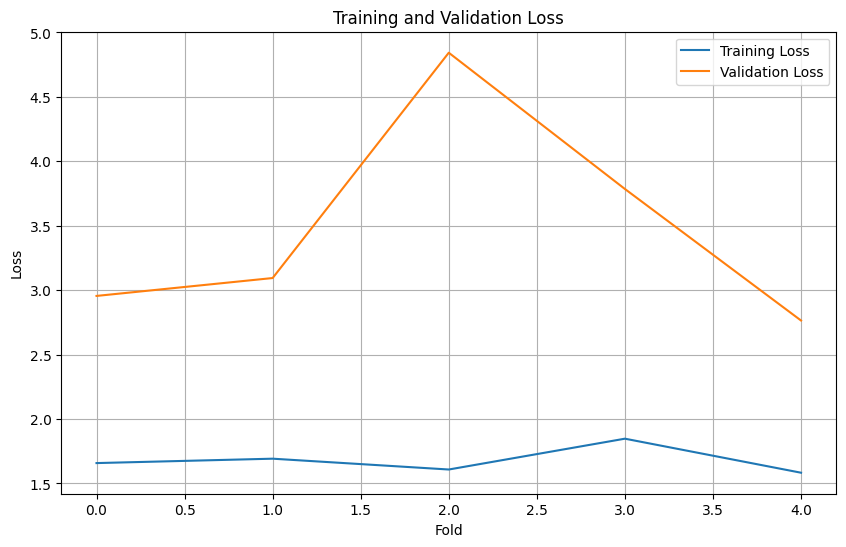

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x484de8c20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step


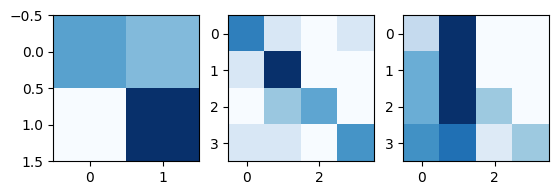

In [37]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

best_model = load_model('./data/ffn/multitask.keras')
model_prediction = best_model.predict(test_values)

envr_prediction = np.argmax(model_prediction[0], axis=1)
med_prediction = np.argmax(model_prediction[1], axis=1)
spec_prediction = np.argmax(model_prediction[2], axis=1)

envr_conf = confusion_matrix(test_envr_labels, envr_prediction)
med_conf = confusion_matrix(test_medium_labels, med_prediction)
spec_conf = confusion_matrix(test_species_labels, spec_prediction)

fig, [ax1, ax2, ax3] = plt.subplots(1, 3)
ax1.imshow(envr_conf, cmap='Blues')
ax2.imshow(med_conf, cmap='Blues')
ax3.imshow(spec_conf, cmap='Blues')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

envr_acc = accuracy_score(test_envr_labels, envr_prediction)
med_acc = accuracy_score(test_medium_labels, med_prediction)
spec_acc = accuracy_score(test_species_labels, spec_prediction)

print(f'Environment:{envr_acc}, Medium:{med_acc}, Species:{spec_acc}')

Environment:0.6923076923076923, Medium:0.7115384615384616, Species:0.3076923076923077


In [39]:
import shap
from tensorflow.keras import Model

data_sample = shap.sample(test_values, 100)

shap_envr_model = Model(
    inputs = best_model.inputs,
    outputs = best_model.outputs[0]
)

shap_medium_model = Model(
    inputs = best_model.inputs,
    outputs = best_model.outputs[1]
)

shap_species_model = Model(
    inputs = best_model.inputs,
    outputs = best_model.outputs[2]
)


envr_explainer = shap.KernelExplainer(shap_envr_model, data_sample)
envr_shaps = envr_explainer.shap_values(data_sample)

med_exp = shap.KernelExplainer(shap_medium_model, data_sample)
med_shapv = med_exp.shap_values(data_sample)

spec_exp = shap.KernelExplainer(shap_species_model, data_sample)
spec_shapv = spec_exp.shap_values(data_sample)


100%|██████████| 52/52 [00:13<00:00,  3.77it/s]


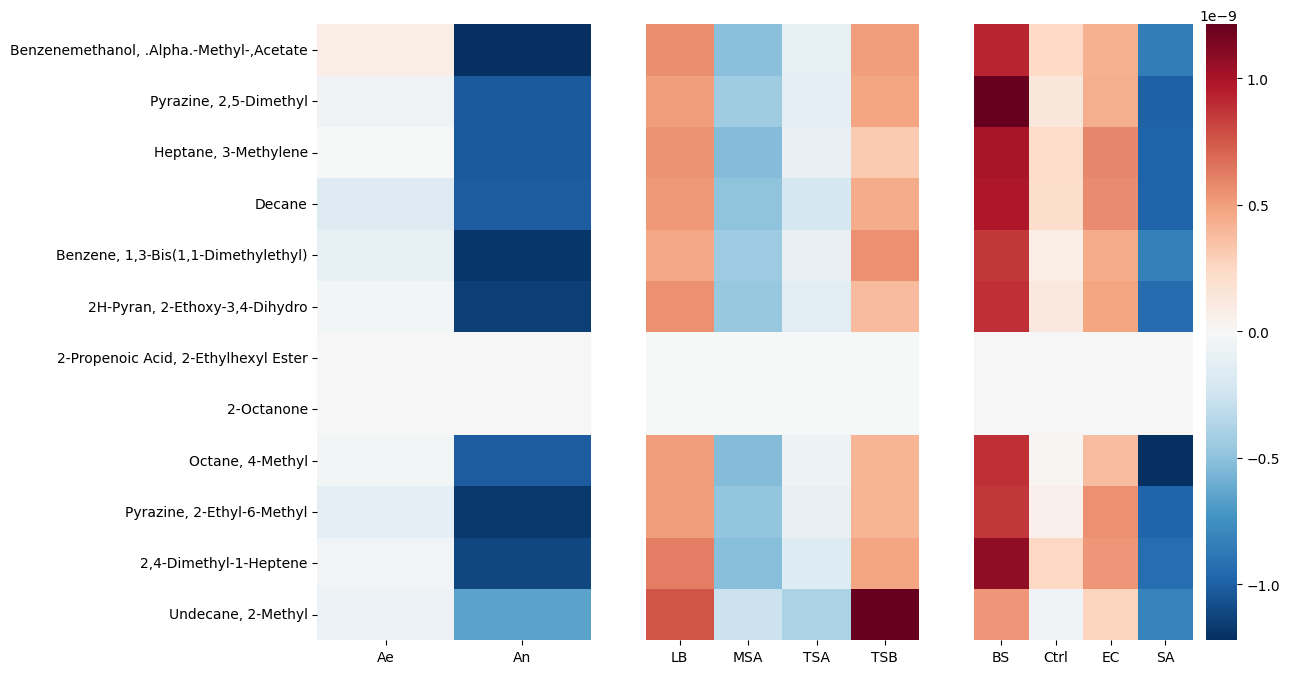

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 8))
sns.heatmap(np.mean(envr_shaps, axis=0), cmap='RdBu_r', center=0, yticklabels=feature_names, xticklabels=envr_string, cbar=False, ax=ax1)
sns.heatmap(np.mean(med_shapv, axis=0), cmap='RdBu_r', center=0, yticklabels=[], xticklabels=medium_string, cbar=False, ax=ax2)
sns.heatmap(np.mean(spec_shapv, axis=0), cmap='RdBu_r', center=0, yticklabels=[], xticklabels=species_string, cbar=True, ax=ax3)
# # plt.title('Averaged SHAP Values')
# plt.tick_params(bottom=False, left=True)
# plt.xlabel('Categories')
# plt.ylabel('Features')
plt.subplots_adjust(wspace=0.2)
plt.savefig('./data/figures/Mulitask-Envr.png', dpi=300, bbox_inches='tight')
plt.show()